In [ ]:
#DATASET LINK
#https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

In [ ]:
#IMPORTING DATASET
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
# Setting DataFrame
df = pd.DataFrame(df)

# Setting the variables
x_axis = df['race/ethnicity']
y_axis = df['math score']

# Figure Size
from matplotlib import pyplot as plt
fig = plt.figure(figsize =(50, 7))

<Figure size 3600x504 with 0 Axes>

<BarContainer object of 50 artists>

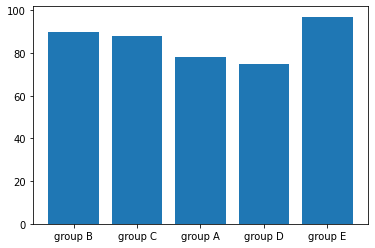

In [ ]:
# Create bar graph, contingency table using any 2 features.
plt.bar(x_axis[0:50], y_axis[0:50])

In [ ]:
#contingency table using any 2 features
pd.crosstab(index=df['gender'], columns=df['race/ethnicity'])

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


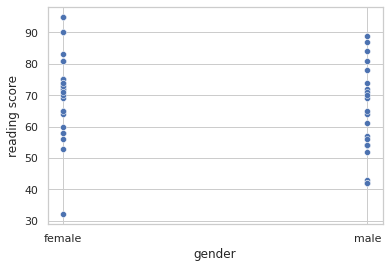

In [ ]:
#Plot Scatter plot using seaborn.
sns.set(style='whitegrid')
x_axis = df['gender'].head(50)
y_axis = df['reading score'].head(50)
sns.scatterplot(x=x_axis, y=y_axis, data=df)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

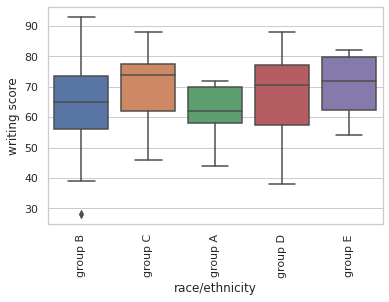

In [ ]:
#Plot box plot using seaborn.
x_axis = df['race/ethnicity'].head(50)
y_axis = df['writing score'].head(50)
sns.boxplot( y=y_axis, x=x_axis);
plt.xticks(rotation = 90)

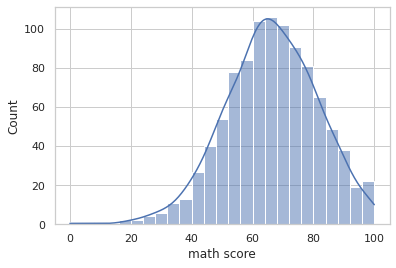

In [ ]:
#Create histogram and normalized Histogram.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.histplot(df['math score'],kde = True)
plt.show()

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers
outliers = find_outliers_IQR(df["math score"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 8
max outlier value: 26
min outlier value: 0


17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

In [ ]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped
outliers_dropped=drop_outliers_IQR(df["math score"])
outliers_dropped

,index,math score
0,17,18
1,59,0
2,145,22
3,338,24
4,466,26
5,787,19
6,842,23
7,980,8


In [ ]:
#after removing outliers
outliers = find_outliers_IQR(df["math score"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 8
max outlier value: 26
min outlier value: 0


17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

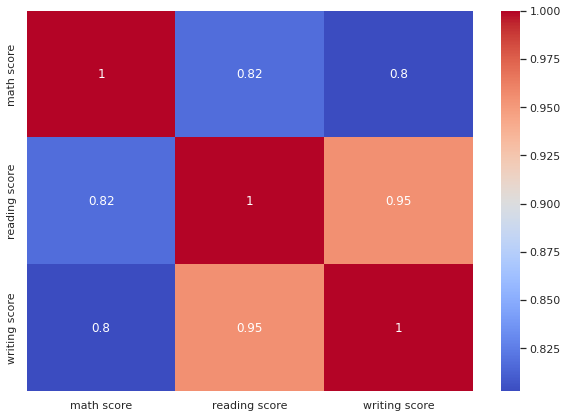

In [ ]:
#Heatmap
sns.set(rc={"figure.figsize":(10,7)})
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()